# 과제1-따릉이 수요량 예측

* OO 시에서 여러분에게 의뢰가 들어왔습니다.
* **공유 자전거 운영팀**에서는 공유자전거가 부족한 지역과 남는 지역에 대해서 판단하기 원합니다.
* 1시간 전에 **공유자전거 수요량**을 예측할 수 있다면, 이동시켜서 남거나 부족한 문제를 해결할수 있다고 합니다.

![](https://cf.creatrip.com/original/blog/7376/kw69f1cy6ehvmmu9enuubth31zw5i7a7.jpg?d=1200&q=80&f=webp)

# 1.환경준비

## (1) 라이브러리 로딩

In [ ]:
# 데이터 다루기 ---------------
import pandas as pd
import numpy as np

# 데이터 시각화 ---------------
import matplotlib.pyplot as plt
import seaborn as sns

# 모델링, 전처리 관련 라이브러리 ---------------싸이킷 런
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

## (2) 데이터로딩

In [ ]:
# 아래 코드는 그냥 실행
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/SeoulBikeData2.csv'
data = pd.read_csv(path)
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.drop(['Visibility','Solar'], axis = 1, inplace = True)
data['Temperature'] = data['Temperature'].shift()
data['Humidity'] = data['Humidity'].shift()
data['WindSpeed'] = data['WindSpeed'].shift()
data['Rainfall'] = data['Rainfall'].shift()
data['Snowfall'] = data['Snowfall'].shift()
data = data[1:]
data.head()

,DateTime,Count,Temperature,Humidity,WindSpeed,Rainfall,Snowfall,Seasons,Holiday,FuncDay
1,2017-12-01 01:00:00,204,-5.2,37.0,2.2,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01 02:00:00,173,-5.5,38.0,0.8,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01 03:00:00,107,-6.0,39.0,1.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01 04:00:00,78,-6.2,40.0,0.9,0.0,0.0,Winter,No Holiday,Yes
5,2017-12-01 05:00:00,100,-6.0,36.0,2.3,0.0,0.0,Winter,No Holiday,Yes


**변수설명**  

* DateTime : year-month-day hh:mi:ss
* Count : 시간대별 수요량
* Temperature : 온도(섭씨) - 한시간 전
* Humidity : 습도(%) - 한시간 전
* WindSpeed : 풍속(m/s) - 한시간 전
* Rainfall - mm - 한시간 전
* Snowfall - cm - 한시간 전
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday / No holiday
* FuncDay - Yes / No


# 2.모델링, 무작정 따라하기

## (1) 데이터 준비

In [ ]:
# 모델링에 불필요한 데이터 제외시키기
drop_cols = ['DateTime']
data2 = data.drop(drop_cols, axis = 1)

### 1) 가변수화

In [ ]:
# 범주형 변수
cat_cols = ['Seasons', 'Holiday','FuncDay']
data2 = pd.get_dummies(data2, columns = cat_cols, drop_first = True)

In [ ]:
data2.head() #False=0, True=1

,Count,Temperature,Humidity,WindSpeed,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,FuncDay_Yes
1,204,-5.2,37.0,2.2,0.0,0.0,False,False,True,True,True
2,173,-5.5,38.0,0.8,0.0,0.0,False,False,True,True,True
3,107,-6.0,39.0,1.0,0.0,0.0,False,False,True,True,True
4,78,-6.2,40.0,0.9,0.0,0.0,False,False,True,True,True
5,100,-6.0,36.0,2.3,0.0,0.0,False,False,True,True,True


### 2) 데이터 분할

In [ ]:
# x, y 나누기
target = 'Count'
x = data2.drop(target, axis = 1)
y = data2[target]

In [ ]:
# train, val 나누기, 24시간*14=2주치의 데이터를 테스트 데이터로 사용, 데이터를 섞지마라
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 24 * 14, shuffle = False )

## (2) 모델링
* 주석에 있는 코드를 그대로 작성해 봅시다.

### 1) 학습

In [ ]:
# 모델 선언 ------------------
# model = LinearRegression()
model = LinearRegression()


# 학습 ----------------
# model.fit(x_train, y_train)
model.fit(x_train, y_train)



LinearRegression()

### 2) 검증

In [ ]:
# 예측 -----------------
# pred = model.predict(x_val)
pred = model.predict(x_val)


In [ ]:
# 평가 : 평균 오차(mean_absolute_error) ---------------
# mean_absolute_error(y_val, pred)
mean_absolute_error(y_val, pred)


306.25645583602454

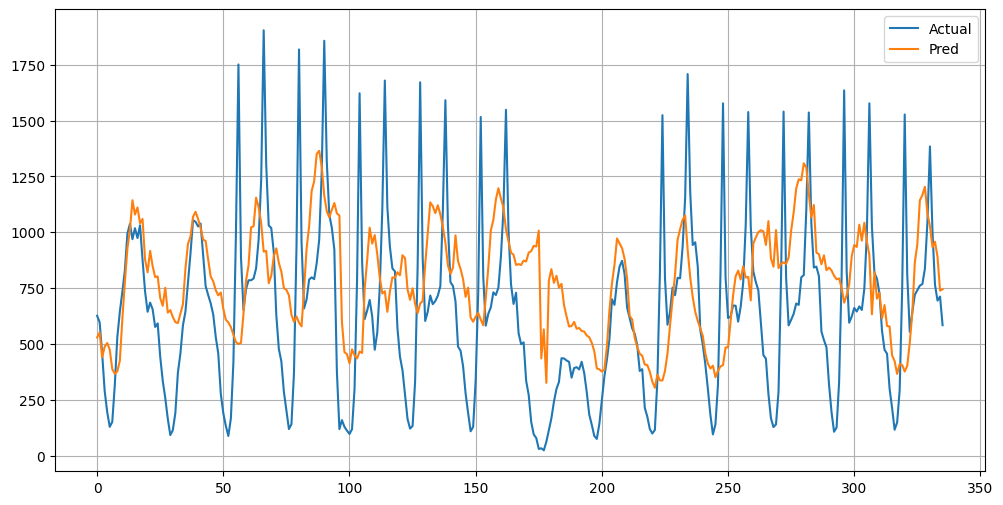

In [ ]:
# 예측 결과를 시각화해 봅시다.
plt.figure(figsize = (12,6))  # 그래프 크기 설정
sns.lineplot(y_val.values, label = 'Actual')  # 실제값 라인차트
sns.lineplot(pred, label = 'Pred')            # 예측값 라인차트
plt.grid()  # 그리드선 추가
plt.show()

# 3.모델링 이해하기

## (1) 샘플데이터 준비

In [ ]:
t = [25,26,28,21,12,17,14,31,8,32] #temp
s = [512,625,661,512,316,355,309,697,263,738] #sales

df = pd.DataFrame({'temperature':t, 'sales':s})
x = df[['temperature']]
y = df['sales']

df

,temperature,sales
0,25,512
1,26,625
2,28,661
3,21,512
4,12,316
5,17,355
6,14,309
7,31,697
8,8,263
9,32,738


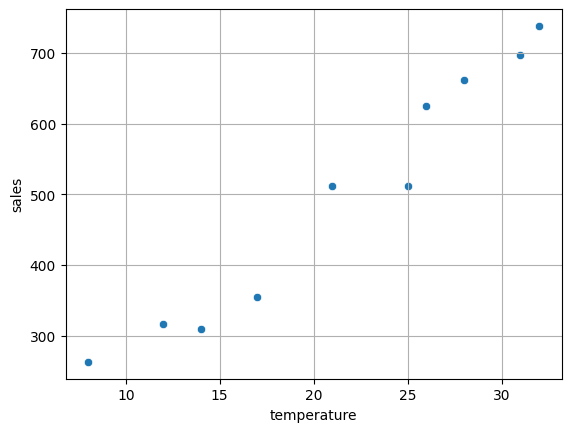

In [ ]:
# 데이터 시각화 : 산점도
sns.scatterplot(x = 'temperature', y='sales', data = df)
plt.grid()

## (2) 모델링

In [ ]:
# 학습
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
# 모델 내부 들여다 보기, 끝에 언더바가 붙는 것은 '어떤 값'을 의미함
print('* 기울기 : ', model.coef_[0])
print('* 절편   : ', model.intercept_)
# ^ sales = 20 * temp + 51 (온도가 1도 올라갈 때 20달러 많이 팔린다)

* 기울기 :  20.89493914157591
* 절편   :  51.64830237027553


## (3) 모델 결과 시각화

* 기울기 :  20.89493914157591
* 절편   :  51.64830237027553


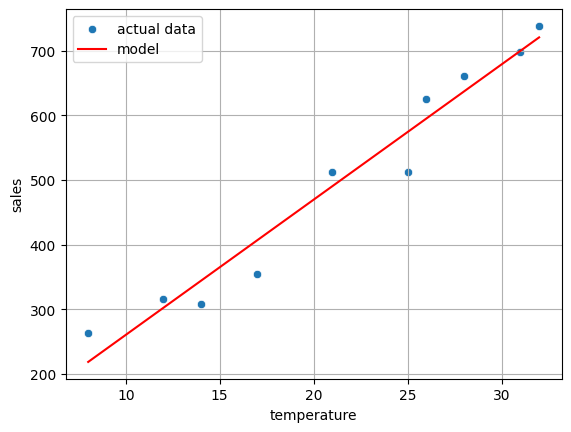

In [ ]:
x = np.linspace(df['temperature'].min(), df['temperature'].max(), 50)
y =  model.coef_[0] * x + model.intercept_

# 데이터 시각화
print('* 기울기 : ', model.coef_[0])
print('* 절편   : ', model.intercept_)

sns.scatterplot(x = 'temperature', y='sales', data = df, label = 'actual data')
sns.lineplot(x = x, y = y, color = 'r', label = 'model')
plt.grid()

# 4.제대로 모델링을 해봅시다.
* 모델에 가장 큰 영향을 주는 것은 데이터 입니다.
* 데이터 구조와 담긴 의미를 이해하는 것이 제일 중요합니다.

## (1) 데이터 구조 살펴보기

In [ ]:
data.head()

,DateTime,Count,Temperature,Humidity,WindSpeed,Rainfall,Snowfall,Seasons,Holiday,FuncDay
1,2017-12-01 01:00:00,204,-5.2,37.0,2.2,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01 02:00:00,173,-5.5,38.0,0.8,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01 03:00:00,107,-6.0,39.0,1.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01 04:00:00,78,-6.2,40.0,0.9,0.0,0.0,Winter,No Holiday,Yes
5,2017-12-01 05:00:00,100,-6.0,36.0,2.3,0.0,0.0,Winter,No Holiday,Yes


## (2) 어떤 정보가 필요할까요?
* 아래 그래프에서 어떤 패턴이 보이나요?

### 1) 데이터 들여다 보기

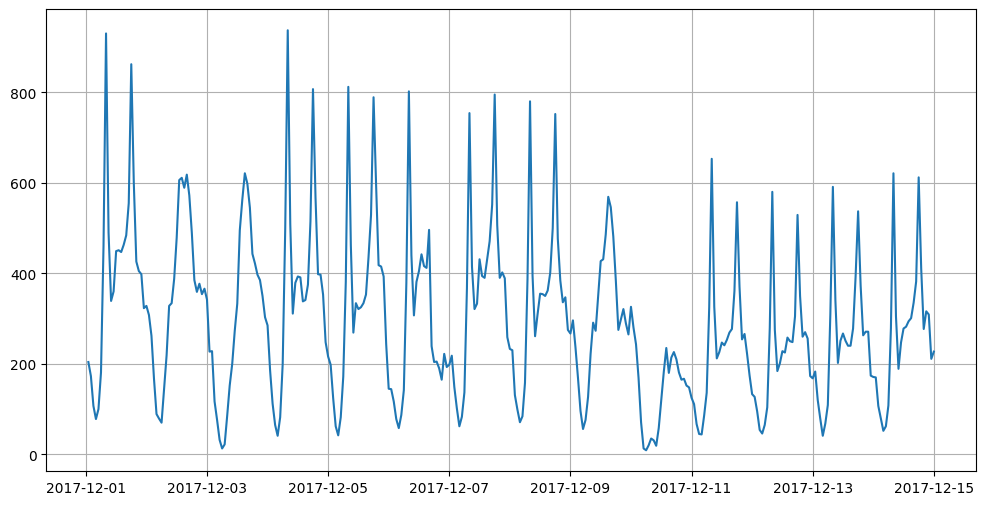

In [ ]:
# 14일 동안의 수요량을 살펴 봅시다.
temp = data[:24*14]
plt.figure(figsize = (12, 6))
plt.plot('DateTime', 'Count', data = temp)
plt.grid()
plt.show()

### 2) 패턴을 데이터가 잘 담을 수 있도록 feature 추가하기

In [ ]:
# 기존데이터 복사
data1 = data.copy()

#### ① 날짜 요소 추가

In [ ]:
# 시간대
data1['Hour'] = data1['DateTime'].dt.hour
data1.head()

,DateTime,Count,Temperature,Humidity,WindSpeed,Rainfall,Snowfall,Seasons,Holiday,FuncDay,Hour
1,2017-12-01 01:00:00,204,-5.2,37.0,2.2,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-12-01 02:00:00,173,-5.5,38.0,0.8,0.0,0.0,Winter,No Holiday,Yes,2
3,2017-12-01 03:00:00,107,-6.0,39.0,1.0,0.0,0.0,Winter,No Holiday,Yes,3
4,2017-12-01 04:00:00,78,-6.2,40.0,0.9,0.0,0.0,Winter,No Holiday,Yes,4
5,2017-12-01 05:00:00,100,-6.0,36.0,2.3,0.0,0.0,Winter,No Holiday,Yes,5


In [ ]:
# 요일
data1['Weekday'] = data1['DateTime'].dt.day_name()
data1.head()

,DateTime,Count,Temperature,Humidity,WindSpeed,Rainfall,Snowfall,Seasons,Holiday,FuncDay,Hour,Weekday
1,2017-12-01 01:00:00,204,-5.2,37.0,2.2,0.0,0.0,Winter,No Holiday,Yes,1,Friday
2,2017-12-01 02:00:00,173,-5.5,38.0,0.8,0.0,0.0,Winter,No Holiday,Yes,2,Friday
3,2017-12-01 03:00:00,107,-6.0,39.0,1.0,0.0,0.0,Winter,No Holiday,Yes,3,Friday
4,2017-12-01 04:00:00,78,-6.2,40.0,0.9,0.0,0.0,Winter,No Holiday,Yes,4,Friday
5,2017-12-01 05:00:00,100,-6.0,36.0,2.3,0.0,0.0,Winter,No Holiday,Yes,5,Friday


In [ ]:
# 더 추가할 만한 요소가 있나요?



#### ② 이전 데이터 추가

In [ ]:
# 1시간 전 수요량
data1['Count_lag1'] = data1['Count'].shift(1)
data1.head()

,DateTime,Count,Temperature,Humidity,WindSpeed,Rainfall,Snowfall,Seasons,Holiday,FuncDay,Hour,Weekday,Count_lag1
1,2017-12-01 01:00:00,204,-5.2,37.0,2.2,0.0,0.0,Winter,No Holiday,Yes,1,Friday,NaN
2,2017-12-01 02:00:00,173,-5.5,38.0,0.8,0.0,0.0,Winter,No Holiday,Yes,2,Friday,204.0
3,2017-12-01 03:00:00,107,-6.0,39.0,1.0,0.0,0.0,Winter,No Holiday,Yes,3,Friday,173.0
4,2017-12-01 04:00:00,78,-6.2,40.0,0.9,0.0,0.0,Winter,No Holiday,Yes,4,Friday,107.0
5,2017-12-01 05:00:00,100,-6.0,36.0,2.3,0.0,0.0,Winter,No Holiday,Yes,5,Friday,78.0


In [ ]:
# 최근 3시간 평균 수요량 : 주의! 아래 코드를 작성할 때는 1시간 전 데이터(data1['Count_lag1'])를 사용해야 함.
data1['Count_MA1'] = data1['Count_lag1'].rolling(3).mean()
data1.head()

,DateTime,Count,Temperature,Humidity,WindSpeed,Rainfall,Snowfall,Seasons,Holiday,FuncDay,Hour,Weekday,Count_lag1,Count_MA1
1,2017-12-01 01:00:00,204,-5.2,37.0,2.2,0.0,0.0,Winter,No Holiday,Yes,1,Friday,NaN,NaN
2,2017-12-01 02:00:00,173,-5.5,38.0,0.8,0.0,0.0,Winter,No Holiday,Yes,2,Friday,204.0,NaN
3,2017-12-01 03:00:00,107,-6.0,39.0,1.0,0.0,0.0,Winter,No Holiday,Yes,3,Friday,173.0,NaN
4,2017-12-01 04:00:00,78,-6.2,40.0,0.9,0.0,0.0,Winter,No Holiday,Yes,4,Friday,107.0,161.333333
5,2017-12-01 05:00:00,100,-6.0,36.0,2.3,0.0,0.0,Winter,No Holiday,Yes,5,Friday,78.0,119.333333


In [ ]:
# 더 추가할 만한 요소가 있나요?



## (3) 데이터 준비

### 1) NaN 제거
* 실전에서는 NaN을 조치하는 다양한 방법이 있지만, 여기서는 제거하겠습니다.

In [ ]:
data2 = data1.dropna(axis = 0)
data2.shape

(8756, 14)

In [ ]:
# 모델링에 불필요한 데이터 제외시키기
drop_cols = ['DateTime']
data2 = data2.drop(drop_cols, axis = 1)

### 2) 가변수화
* 모델링을 위해서 모든 데이터를 **숫자**로 바꿔야 합니다.

In [ ]:
# 범주형 변수
cat_cols = ['Seasons', 'Holiday','FuncDay','Hour','Weekday']
data2 = pd.get_dummies(data2, columns = cat_cols, drop_first = True)

### 3) 데이터 분할
* 모델링을 위한 데이터와 검증을 위한 데이터로 분리

In [ ]:
# x, y 나누기
target = 'Count'
x = data2.drop(target, axis = 1)
y = data2[target]

In [ ]:
# train, val 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 24 * 14, shuffle = False )

## (4) 모델링
* **2. 모델링, 무작정 따라하기 > (2) 모델링** 부분을 참조로 모델링 코드를 작성해 봅시다.

### 1) 학습

In [ ]:
# 모델 선언 ----------------
model = LinearRegression()

# 학습 ----------------
model.fit(x_train, y_train)


LinearRegression()

### 2) 검증

In [ ]:
# 예측 ----------------
pred = model.predict(x_val)


In [ ]:
pred

array([ 577.88113355,  513.79754496,  467.64030424,  333.65552161,
        185.28979219,  182.10664961,  266.68500416,  463.21452558,
        728.90119823,  205.23908228,  625.65573552,  880.89178052,
        947.32059674, 1025.39207431, 1053.43278035, 1010.32457181,
       1092.98182896, 1164.73477946, 1399.01628105,  602.91549034,
        710.38729482,  746.53277662,  702.13409689,  519.21310251,
        525.38225998,  529.89885038,  332.81539294,  246.06809752,
        202.85340767,  184.79921654,  248.30654146,  447.26134529,
        623.5341161 ,   73.58894756,  450.04725564,  754.36036329,
        777.9361332 ,  800.41972657,  930.90161423, 1109.01815709,
       1112.01608918, 1185.02229727, 1373.79506613,  595.96200383,
        716.99822154,  799.71855726,  665.5107558 ,  466.40494908,
        508.30460359,  426.18249669,  209.69602104,  144.24332528,
        118.01841908,  140.60980429,  351.3354082 ,  760.31141769,
       1397.02923333, 1355.74910267,  678.06802607,  651.67727

In [ ]:
# 평가 : 평균 오차(mean_absolute_error) ----------------
mean_absolute_error(y_val, pred)


107.88888078828573

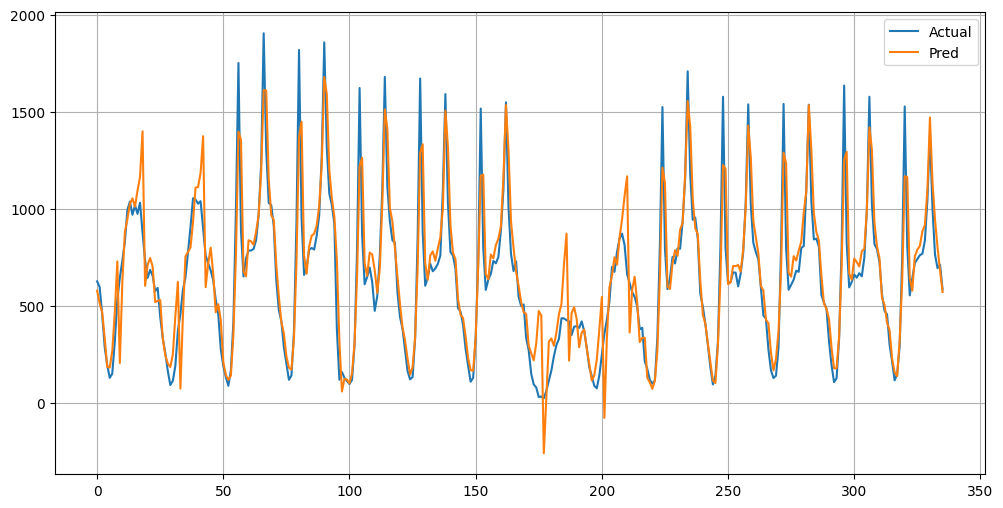

In [ ]:
# 예측 결과를 시각화
plt.figure(figsize = (12,6))
sns.lineplot(y_val.values, label = 'Actual')
sns.lineplot(pred, label = 'Pred')
plt.grid()
plt.show()